<a href="https://colab.research.google.com/github/Z0rr09/OD-WeaponDetection/blob/master/Notebook_module_3v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import requests
import zipfile
from io import BytesIO

# Define the GitHub repository URL
repo_url = 'https://github.com/ari-dasci/OD-WeaponDetection/archive/master.zip'

# Download the zip file from GitHub
response = requests.get(repo_url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Specify the target directory in Colab
target_dir = '/content/OD-WeaponDetection'

# Extract the contents of the zip file to the target directory
zip_file.extractall(target_dir)

# Identify the actual directory containing the dataset
dataset_dir = os.path.join(target_dir, 'OD-WeaponDetection-master', 'Pistol detection')

# Print the contents of the dataset directory
print(os.listdir(dataset_dir))




KeyboardInterrupt: 

In [3]:


# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define root directory
root_dir = '/content/OD-WeaponDetection/OD-WeaponDetection-master/Pistol detection'

# Define paths to your dataset
images_dir = os.path.join(root_dir, 'Weapons')
annotations_dir = '/content/OD-WeaponDetection/OD-WeaponDetection-master/Pistol detection/xmls'

# Image parameters
img_height, img_width = 150, 150
batch_size = 32

# Create a list of image files
image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith('.jpg')]

# Create a list of annotation files
annotation_files = [os.path.join(annotations_dir, file) for file in os.listdir(annotations_dir) if file.endswith('.xml')]

# Ensure that corresponding image and annotation files exist
image_files = [file for file in image_files if os.path.splitext(file)[0] + '.xml' in annotation_files]

# Split the dataset into training and testing sets
train_image_files, test_image_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Create data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_list(
    train_image_files,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_list(
    test_image_files,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ca va ?


In [1]:
# Install necessary libraries
#!pip install torch torchvision

# Import libraries
import torch
from torchvision import transforms, datasets
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torch.utils.data import DataLoader
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np




In [25]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define dataset paths
image_folder = "https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/Weapons"
annotation_folder = "https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/xmls"

# Define transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.VOCDetection(root=image_folder, year='2007', image_set='train', download=True, transform=transform)


100%|██████████| 460032000/460032000 [00:19<00:00, 23070723.55it/s]


Extracting https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/Weapons/VOCtrainval_06-Nov-2007.tar to https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/Weapons


Using downloaded and verified file: https://github.com/ari-dasci/OD-WeaponDetection/raw/main/Pistol%20detection/Weapons/VOCtrainval_06-Nov-2007.tar
Extracting https://github.com/ari-dasci/OD-WeaponDetection/raw/main/Pistol%20detection/Weapons/VOCtrainval_06-Nov-2007.tar to https://github.com/ari-dasci/OD-WeaponDetection/raw/main/Pistol%20detection/Weapons


NameError: name 'my_collate' is not defined

In [26]:

# Define custom collate function
def my_collate(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    # Resize images to a common size (e.g., 500x500)
    images = [F.resize(img, (500, 500)) for img in images]

    return torch.stack(images), targets

# Define data loader with custom collate function
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2, collate_fn=my_collate)



# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
criterion = torch.nn.SmoothL1Loss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
subset_data_loader


In [28]:

# Load dataset with a subset
subset_size = 50  # Change this to the desired subset size
subset_dataset = datasets.VOCDetection(root=image_folder, image_set='train', download=True, transform=transform)
subset_dataset = torch.utils.data.Subset(subset_dataset, range(subset_size))

# Define data loader with custom collate function
subset_data_loader = DataLoader(subset_dataset, batch_size=2, shuffle=True, num_workers=2, collate_fn=my_collate)

100%|██████████| 1999639040/1999639040 [01:07<00:00, 29791474.11it/s]


Extracting https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/Weapons/VOCtrainval_11-May-2012.tar to https://github.com/ari-dasci/OD-WeaponDetection/tree/48860b990e4d4f57fe100248887fceb248475dc8/Pistol%20detection/Weapons


In [ ]:
# ... (previous code)

# Training loop (light training for demonstration purposes)
num_epochs = 5
for epoch in range(num_epochs):
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)

        # Modify targets to include necessary keys (assuming bounding box annotations and labels)
        targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]
        for target in targets:
            if "boxes" not in target:
                target["boxes"] = torch.zeros((0, 4), dtype=torch.float32, device=device)
            if "labels" not in target:
                target["labels"] = torch.zeros((0,), dtype=torch.int64, device=device)

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

# ... (continue with the rest of the script)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

In [5]:
# Training loop (light training for demonstration purposes)
num_epochs = 1
for epoch in range(num_epochs):
    for images, targets in subset_data_loader:
        images = list(image.to(device) for image in images)

        # Modify targets to include necessary keys (assuming bounding box annotations and labels)
        targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]
        for target in targets:
            if "boxes" not in target:
                target["boxes"] = torch.zeros((0, 4), dtype=torch.float32, device=device)
            if "labels" not in target:
                target["labels"] = torch.zeros((0,), dtype=torch.int64, device=device)

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

# ... (continue with the rest of the script

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

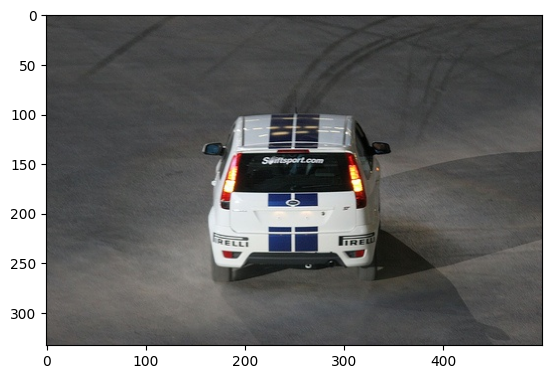

In [21]:
# ... (previous code)

# Display the original image and the predicted bounding boxes
image = F.to_pil_image(sample_image.cpu())
draw = ImageDraw.Draw(image)

# Get predicted classes and bounding boxes
predicted_classes = prediction[0]['labels'].cpu().numpy()
predicted_boxes = prediction[0]['boxes'].cpu().numpy()

# Display bounding boxes and class labels
for box, label in zip(predicted_boxes, predicted_classes):
    draw.rectangle(box, outline="red")
    draw.text((box[0], box[1]), f"Class: {label}", fill="red")

plt.imshow(image)
plt.show()

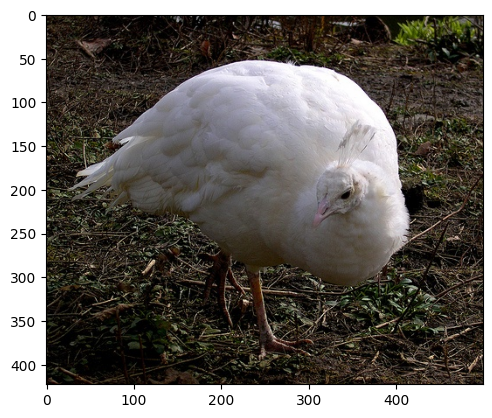

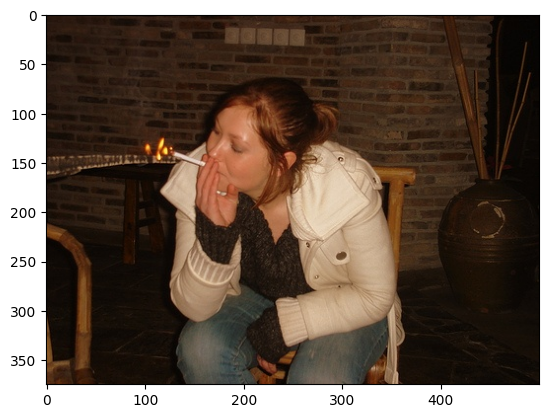

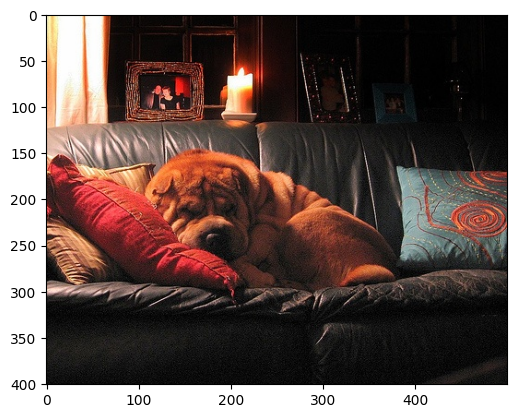

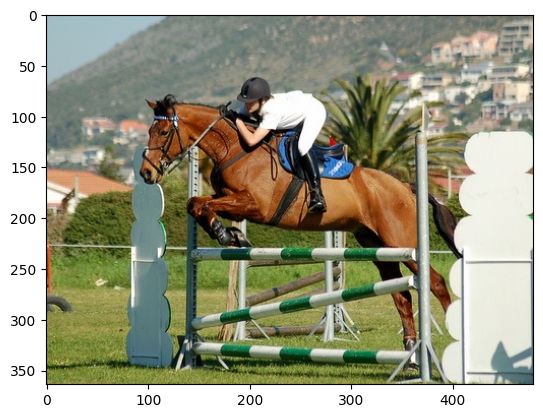

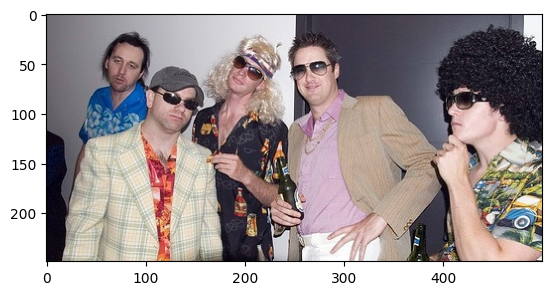

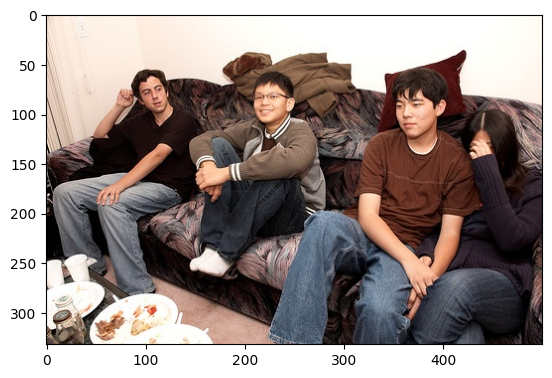

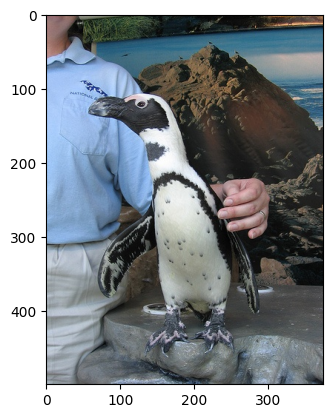

In [24]:
import random
from PIL import Image, ImageDraw

# Set the model to evaluation mode
model.eval()

# Number of images to visualize
num_images_to_visualize = 10

# Get a random sample of ten indices from the subset dataset
random_indices = random.sample(range(len(subset_dataset)), num_images_to_visualize)

for i in random_indices:
    with torch.no_grad():
        # Load a different image from the subset dataset
        sample_image, sample_target = subset_dataset[i]

        # Convert tensor to PIL Image
        sample_image = transforms.ToPILImage()(sample_image)

        # Apply the same transform used during training
        sample_image = transform(sample_image).to(device)
        prediction = model([sample_image])

    # Display the original image and the predicted bounding boxes
    image = F.to_pil_image(sample_image.cpu())
    draw = ImageDraw.Draw(image)

    # Get predicted classes and bounding boxes
    predicted_classes = prediction[0]['labels'].cpu().numpy()
    predicted_boxes = prediction[0]['boxes'].cpu().numpy()

    # Display bounding boxes and class labels
    for box, label in zip(predicted_boxes, predicted_classes):
        draw.rectangle(box, outline="red")
        draw.text((box[0], box[1]), f"Class: {label}", fill="red")

    plt.imshow(image)
    plt.show()


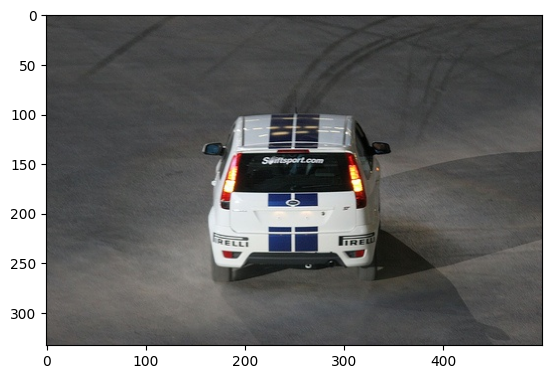

In [19]:
from PIL import Image, ImageDraw

# ... (previous code)

# Display the original image and the predicted bounding boxes
image = F.to_pil_image(sample_image.cpu())
draw = ImageDraw.Draw(image)

# Adjust the format of predicted bounding boxes if needed
boxes = prediction[0]['boxes'].cpu().numpy()
for box in boxes:
    draw.rectangle(box, outline="red")

plt.imshow(image)
plt.show()


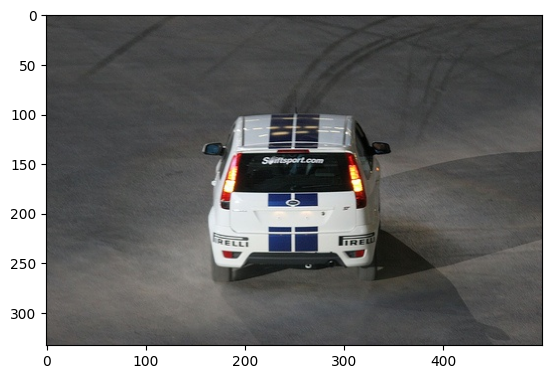

In [20]:
model.eval()

with torch.no_grad():
    sample_image, sample_target = subset_dataset[0]

    # Convert tensor to PIL Image
    sample_image = transforms.ToPILImage()(sample_image)

    # Apply the same transform used during training
    sample_image = transform(sample_image).to(device)
    prediction = model([sample_image])

# Display the original image and the predicted bounding boxes
image = F.to_pil_image(sample_image.cpu())
draw = ImageDraw.Draw(image)

# Adjust the format of predicted bounding boxes if needed
boxes = prediction[0]['boxes'].cpu().numpy()
for box in boxes:
    draw.rectangle(box, outline="red")

plt.imshow(image)
plt.show()


In [9]:
# ... (previous code)

# Evaluation loop
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        prediction = model(images)
        all_predictions.extend(prediction)
        all_targets.extend(targets)

# Calculate Average Precision
from sklearn.metrics import average_precision_score

y_true = []
y_scores = []

for target, prediction in zip(all_targets, all_predictions):
    # Convert box coordinates to numpy arrays for easier handling
    target_boxes = target['boxes'].cpu().numpy()
    prediction_boxes = prediction['boxes'].cpu().numpy()

    # Calculate IoU (Intersection over Union) between target and prediction boxes
    iou = calculate_iou(target_boxes, prediction_boxes)

    # Determine true positives (IoU > threshold)
    true_positives = (iou > 0.5).sum()

    # Append ground truth and prediction information
    y_true.append(torch.ones(true_positives))
    y_true.append(torch.zeros(len(target_boxes) - true_positives))

    y_scores.append(prediction['scores'])
    y_scores.append(torch.zeros(len(target_boxes) - true_positives))

y_true = torch.cat(y_true)
y_scores = torch.cat(y_scores)

# Calculate Average Precision using sklearn
average_precision = average_precision_score(y_true.numpy(), y_scores.numpy())
print(f'Average Precision: {average_precision}')

# Visualize predictions on a few test images
model.eval()
with torch.no_grad():
    for i in range(3):  # Visualize predictions for the first 3 images
        sample_image, sample_target = dataset[i]
        sample_image = sample_image.unsqueeze(0).to(device)
        prediction = model([sample_image])[0]

        # Display the original image and the predicted bounding boxes
        image = F.to_pil_image(sample_image.cpu().squeeze())
        draw = ImageDraw.Draw(image)

        for box, score in zip(prediction['boxes'], prediction['scores']):
            if score > 0.5:  # Confidence threshold
                draw.rectangle(box.cpu().numpy(), outline="red")

        plt.imshow(image)
        plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

AttributeError: 'dict' object has no attribute 'to'